In [2]:
import pandas as pd
import numpy as np
from gensim.models import word2vec
from sklearn.manifold import TSNE
import plotly.express as px

In [3]:
# word2vec parameters
w2v_params = dict(
    window = 5,
    vector_size = 246,
    min_count = 50,
    workers = 4
)

In [4]:
TOKENS=pd.read_pickle("/Users/Lingmin/Desktop/Patent_project/data/TOKENS.pickle")


In [5]:
TOKENS

pos_tuple  pos   token_str    term_str
doc_id  token_num                                               
5597916 0           (examples, NNS)  NNS    examples    examples
        1          (analytical, JJ)   JJ  analytical  analytical
        2               (data, NNS)  NNS        data        data
        3               (were, VBD)  VBD        were        were
        4           (recorded, VBN)  VBN    recorded    recorded
...                             ...  ...         ...         ...
5619621 4717       (permitted, VBN)  VBN   permitted   permitted
        4718               (by, IN)   IN          by          by
        4719              (the, DT)   DT         the         the
        4720            (prior, JJ)   JJ       prior       prior
        4721              (art, NN)   NN         art         art

[5820454 rows x 4 columns]

In [6]:
VOCAB=pd.read_pickle("/Users/Lingmin/Desktop/Patent_project/data/VOCAB.pickle")


In [7]:
VOCAB

n             p  \
term_str                                                                 
the                                               516192  8.868587e-02   
of                                                211333  3.630868e-02   
a                                                 166947  2.868281e-02   
to                                                140073  2.406565e-02   
and                                               132468  2.275905e-02   
...                                                  ...           ...   
aspleugluglugluglugluglugluglugluglugluaspglnlys       1  1.718079e-07   
argthrpheleuprogluglnasnproaspmetproprohisleupro       1  1.718079e-07   
glyleuproserproprotyrglythrmetaspserserhisvalphe       1  1.718079e-07   
alaalathrleualaglyproglnserhisglyserilepheserser       1  1.718079e-07   
uninitialized                                          1  1.718079e-07   

                                                          i  n_chars max_pos  \
term_str                                                                       
the                                                3.495152        3      DT   
of                                                 4.783542        2      IN   
a                                                  5.123670        1      DT   
to                                                 5.376881        2      TO   
and                                                5.457416        3      CC   
...                                                     ...      ...     ...   
aspleugluglugluglugluglugluglugluglugluaspglnlys  22.472700       48      NN   
argthrpheleuprogluglnasnproaspmetproprohisleupro  22.472700       48      JJ   
glyleuproserproprotyrglythrmetaspserserhisvalphe  22.472700       48      NN   
alaalathrleualaglyproglnserhisglyserilepheserser  22.472700       48      FW   
uninitialized                                     22.472700       13      JJ   

                                                  n_pos  stop  \
term_str                                                        
the                                                   1     1   
of                                                    1     1   
a                                                     1     1   
to                                                    1     1   
and                                                   1     1   
...                                                 ...   ...   
aspleugluglugluglugluglugluglugluglugluaspglnlys      1     0   
argthrpheleuprogluglnasnproaspmetproprohisleupro      1     0   
glyleuproserproprotyrglythrmetaspserserhisvalphe      1     0   
alaalathrleualaglyproglnserhisglyserilepheserser      1     0   
uninitialized                                         1     0   

                                                                                            p_stem  
term_str                                                                                            
the                                                                                            the  
of                                                                                              of  
a                                                                                                a  
to                                                                                              to  
and                                                                                            and  
...                                                                                            ...  
aspleugluglugluglugluglugluglugluglugluaspglnlys   aspleugluglugluglugluglugluglugluglugluaspglnli  
argthrpheleuprogluglnasnproaspmetproprohisleupro  argthrpheleuprogluglnasnproaspmetproprohisleupro  
glyleuproserproprotyrglythrmetaspserserhisvalphe   glyleuproserproprotyrglythrmetaspserserhisvalph  
alaalathrleualaglyproglnserhisglyserilepheserser    alaalathrleualaglyproglnserhisglyserilephe

In [8]:
DOCS = TOKENS[~TOKENS.pos.str.match('NNPS?')]\
    .groupby('doc_id')\
    .term_str.apply(lambda  x:  x.tolist())\
    .reset_index()['term_str'].tolist()


In [9]:
DOCS = [doc for doc in DOCS if len(doc) > 1] # Lose single word docs

In [12]:
model = word2vec.Word2Vec(DOCS, **w2v_params)

## Terms and embeddings,  added to the VOCAB table

In [13]:
coords = pd.DataFrame(
    dict(
        vector = [model.wv.get_vector(w) for w in model.wv.key_to_index], 
        term_str = model.wv.index_to_key
    )).set_index('term_str')

In [21]:
coords

vector          x  \
term_str                                                                 
sub       [0.3469308, -0.42489615, -0.7757569, -0.167099...  30.226658   
data      [-2.011618, 0.19157991, 0.9235089, -0.45130992...  30.033598   
fig       [0.3133058, -1.2360921, 0.01521809, 1.1861347,... -56.139984   
input     [-0.6337563, 0.033616986, 1.1968488, 0.5377443... -44.890392   
signal    [-1.1439083, -0.2194383, 1.447575, -0.1806154,... -39.576672   
...                                                     ...        ...   
bgtbp     [0.0013843935, -0.3500647, -0.051580198, -0.06...  -8.063810   
upshift   [0.0115534635, -0.15814106, 0.057280455, -0.11...   8.208532   
handler   [-0.0025049492, 0.0006058572, 0.01100566, 0.08...   9.891686   
rotates   [0.16336717, -0.38235566, 0.22484802, -0.26613... -43.239101   
dealing   [0.11027491, -0.15486865, 0.40706083, -0.28365...  -6.675998   

                  y      n         p          i  n_chars max_pos  n_pos  stop  \
term_str                                                                        
sub       46.737396  66664  0.011453   6.448080        3      NN     17     0   
data     -26.301168  30014  0.005157   7.599352        4     NNS     14     0   
fig      -27.546696  29043  0.004990   7.646797        3      NN     17     0   
input    -17.882654  19042  0.003272   8.255803        5      NN     11     0   
signal   -12.332848  18116  0.003112   8.327723        6      NN     10     0   
...             ...    ...       ...        ...      ...     ...    ...   ...   
bgtbp     57.681068     50  0.000009  16.828844        5      NN      3     0   
upshift    1.996783     50  0.000009  16.828844        7      JJ      2     0   
handler   -7.998009     50  0.000009  16.828844        7      NN      2     0   
rotates   26.162287     50  0.000009  16.828844        7     VBZ      2     0   
dealing  -14.937824     50  0.000009  16.828844        7     VBG      1     0   

           p_stem  
term_str           
sub           sub  
data         data  
fig           fig  
input       input  
signal     signal  
...           ...  
bgtbp       bgtbp  
upshift   upshift  
handler   handler  
rotates     rotat  
dealing      deal  

[5987 rows x 11 columns]

In [22]:
coords.to_csv(f'/Users/Lingmin/Desktop/Patent_project/data/coords.csv')

In [14]:
tsne_engine = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
tsne_model = tsne_engine.fit_transform(np.array(coords.vector.to_list()))

In [15]:
coords['x'] = tsne_model[:,0]
coords['y'] = tsne_model[:,1]

# add some vocab feature

In [16]:
if coords.shape[1] == 3:
    coords = coords.merge(VOCAB.reset_index(), on='term_str')
    coords = coords.set_index('term_str')

In [17]:
coords = coords[coords.stop == 0]

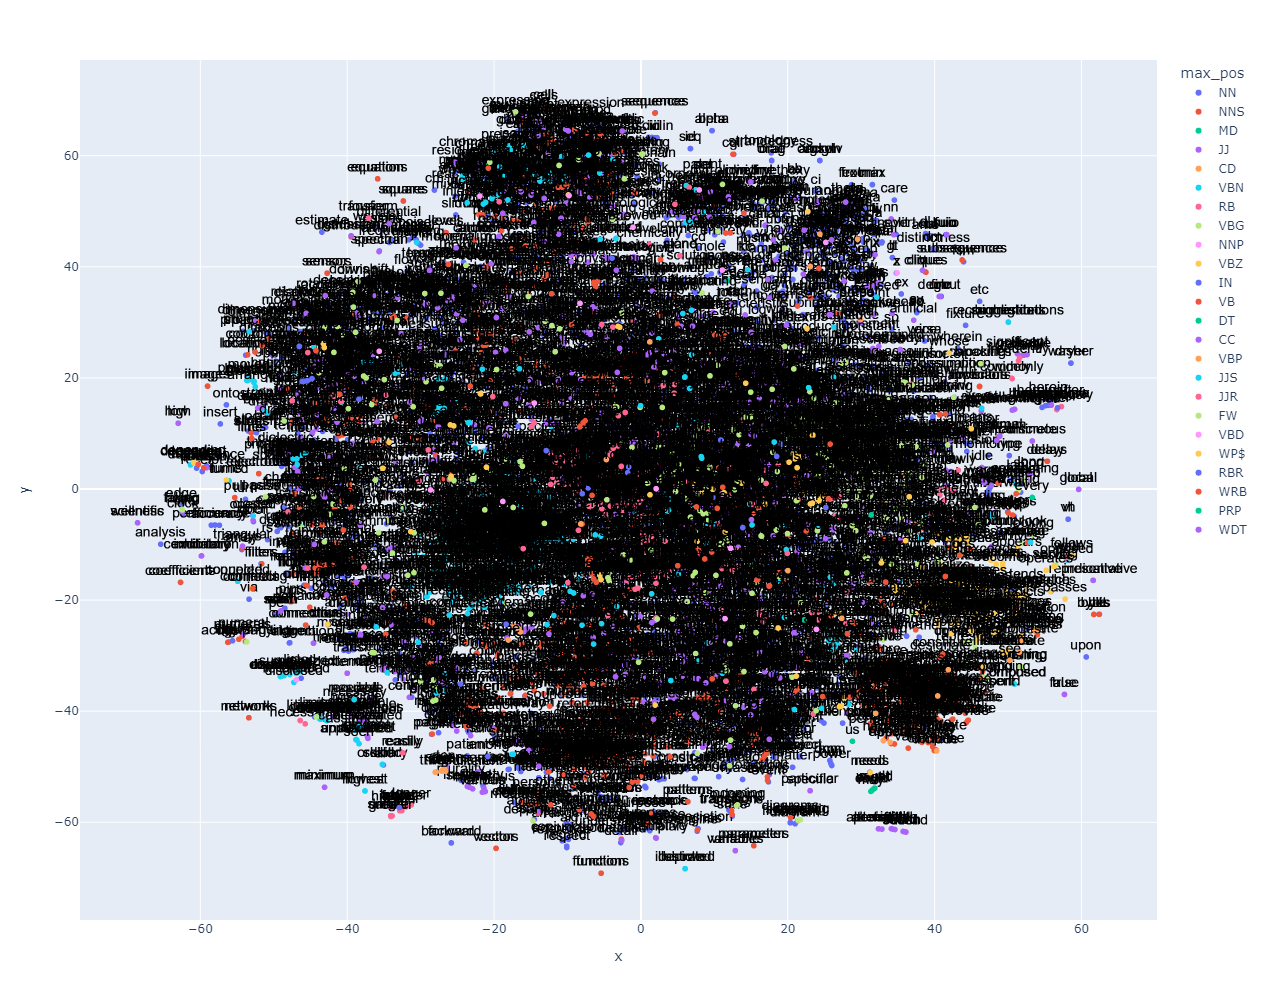

In [18]:
px.scatter(coords.reset_index(), 'x', 'y', 
           text='term_str', 
           color='max_pos', 
           hover_name='term_str',          
           #vector_size='tfbidf_max',
           height=1000).update_traces(
                mode='markers+text', 
                textfont=dict(color='black', size=14, family='Arial'),
                textposition='top center')